In [2]:
# Getting the stocks of yahoo, apple, google, tesla

In [1]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import numpy as np

In [2]:
start = datetime(2016, 1, 1)
end = datetime(2019, 12, 31)
google = web.DataReader('GOOG', 'yahoo', start, end)
tesla = web.DataReader('TSLA', 'yahoo', start, end)
apple = web.DataReader('AAPL', 'yahoo', start, end)

## Predicting apple stock price for December 2019 using data fram January 2016 to end of november 2019

In [3]:
apple.shape#Take a look at the dataset shape,size

(1006, 6)

In [4]:
apple[:-21].tail()#Tail of dataframe up until the december 2019

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-22,263.179993,260.839996,262.589996,261.779999,16331300.0,261.779999
2019-11-25,266.440002,262.519989,262.709991,266.369995,21005100.0,266.369995
2019-11-26,267.160004,262.500000,266.940002,264.290009,26301900.0,264.290009
2019-11-27,267.980011,265.309998,265.579987,267.839996,16308900.0,267.839996
2019-11-29,268.000000,265.899994,266.600006,267.250000,11654400.0,267.250000


In [5]:
train_df = apple[:-21]#Training set till end of November 2019

In [6]:
train_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.606438


In [7]:
test_df = apple.tail(21)#December Apple stock and our test set

In [10]:
real_stock_price = train_df.iloc[:, 3:4].values#Using the closing price

In [43]:
len(real_stock_price)

1006

In [11]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

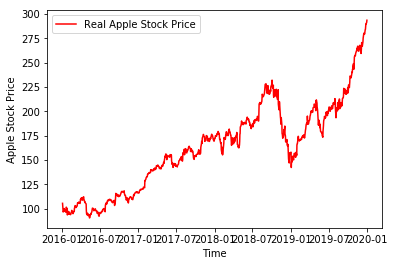

In [28]:
# Visualising the stocks
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [36]:
real_stock_price = apple['Close']

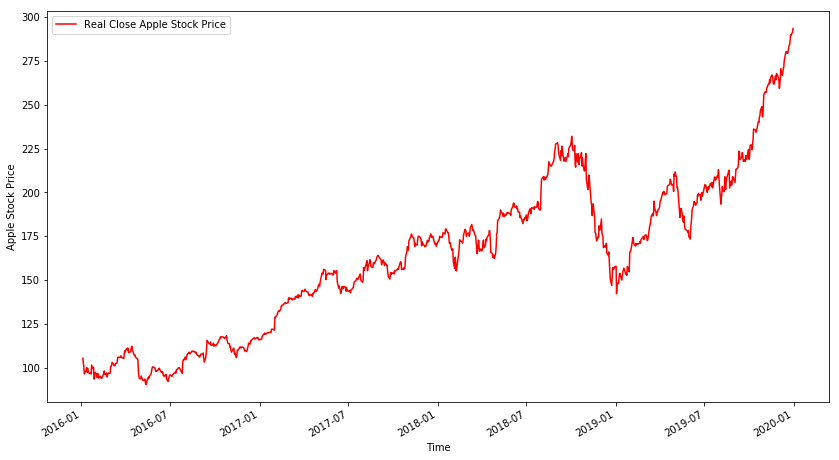

In [13]:
real_stock_price.plot(kind = 'line', figsize = (14,8),color = 'red', label = 'Real Close Apple Stock Price')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [14]:
# Trainign and testing sets using the closing stock prices
training_set = train_df.iloc[:, 3:4].values
testing_set = test_df.iloc[:, 3:4].values

In [31]:
train_df.shape

(985, 6)

In [15]:
# Feature Scaling
#MinMax scaler is found to be more optimal for any sigmoidal activation function
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [16]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 985):
    X_train.append(training_set_scaled[i-60:i, 0])#all previous 60 time-steps
    y_train.append(training_set_scaled[i, 0])#the next time step after previous 60 time steps
X_train, y_train = np.array(X_train), np.array(y_train)#convert to np.array

In [17]:
#Resshaping to get 3-d tensor form needed by RNN
#First dim - total no of input observations ie prices from 2016 throu 2019-Nov
#Second dim - no of time steps to predict a given observation
#3rd dim- Indicators which here is one considering only close prices. Could include open, volume etc
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building RNN

In [18]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [19]:
# Initialising the RNN
regressor = Sequential()#regressing because we are predicting a continuous value

In [20]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))#Rate of neurons to drop out in each backpropagation,here 20%

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [23]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [24]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [25]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
925/925 [==============================] - 4s 4ms/step - loss: 0.0398
Epoch 2/100
925/925 [==============================] - 2s 2ms/step - loss: 0.0073
Epoch 3/100
925/925 [==============================] - 2s 2ms/step - loss: 0.0053
Epoch 4/100
925/925 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 5/100
925/925 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 6/100
925/925 [==============================] - 2s 2ms/step - loss: 0.0045
Epoch 7/100
925/925 [==============================] - 2s 2ms/step - loss: 0.0045
Epoch 8/100
925/925 [==============================] - 2s 2ms/step - loss: 0.0042
Epoch 9/100
925/925 [==============================] - 2s 2ms/step - loss: 0.0042
Epoch 10/100
925/925 [==============================] - 2s 2ms/step - loss: 0.0036
Epoch 11/100
925/925 [==============================] - 2s 2ms/step - loss: 0.0043
Epoch 12/100
925/925 [==========================

925/925 [==============================] - 2s 2ms/step - loss: 0.0013
Epoch 97/100
925/925 [==============================] - 2s 2ms/step - loss: 0.0013
Epoch 98/100
925/925 [==============================] - 2s 2ms/step - loss: 0.0015
Epoch 99/100
925/925 [==============================] - 2s 2ms/step - loss: 0.0013
Epoch 100/100
925/925 [==============================] - 2s 2ms/step - loss: 0.0012


### Getting the predicted stock price of December 2019 using trained model

In [27]:
# Get all the datasets (train and test df into one dataframe)
dataset_total = pd.concat((train_df['Close'], test_df['Close']), axis = 0)#same as dataframe 'apple'

In [44]:
dataset_total.shape

(1006,)

In [29]:
len(dataset_total) - len(test_df)# - 60:

985

In [30]:
#find the needed dataset for predicting the December stocks
inputs = dataset_total[len(dataset_total) - len(test_df) - 60:].values

In [31]:
##make necessary transformation of this new dataset including reshaping and scaling using MinMx Scaler object
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [32]:
#Get the Xtest which will have for each day of december 2019, the preceeding 60 days before it
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])

In [33]:
#reshape
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [34]:
#Make predictions and transfer back to normal values for comparable visualization
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [48]:
real_stock_price = test_df['Close']#Using the closing price of the test set

In [49]:
len(real_stock_price.index)

21

In [39]:
predicted_stock_price.shape

(21, 1)

In [50]:
#put it in a datetime dataframe
predicted = pd.DataFrame(predicted_stock_price, index = real_stock_price.index)

In [59]:
#predicted[0]

In [51]:
#Combine two dataframess into one
predicted_Real = pd.concat([real_stock_price,predicted[0]],axis = 1)

In [52]:
#Rename the two columns
predicted_Real.rename(columns = {'Close':'Real Apple Stock', 0:'Predicted Apple Stock'}, inplace = True)

In [53]:
predicted_Real.head()

,Real Apple Stock,Predicted Apple Stock
Date,,
2019-12-02,264.160004,264.744415
2019-12-03,259.450012,265.420349
2019-12-04,261.739990,264.420502
2019-12-05,265.579987,262.576813
2019-12-06,270.709991,261.401520


In [53]:
len(predicted.values)

21

In [37]:
real_stock_price = test_df.iloc[:, 3:4].values

In [41]:
real_stock_price = test_df['Close']

In [38]:
len(real_stock_price)

21

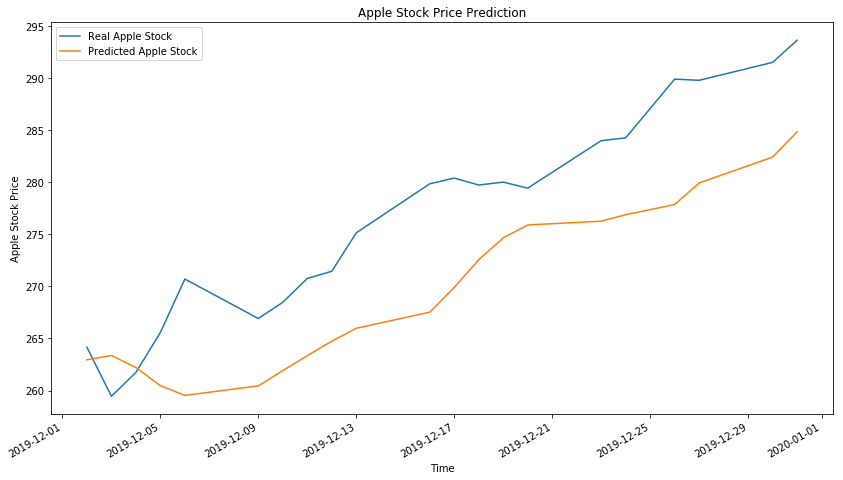

In [67]:
# Visualising the results
predicted_Real.plot(kind = 'line', figsize = (14,8))
#plt.plot(predicted.values, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [54]:
#save the model as pickle
import pickle

In [60]:
StockRNNModel = 'CapstoneProject/StockRNNModel.pkl'#zCreate a file path
pickle.dump(regressor, open(StockRNNModel, 'wb'))#Write the model into the file path

In [62]:
#StockRNNModel.close()

In [ ]:
#To import the model

In [64]:
from flask import Flask
from flask import render_template, request, jsonify
#from plotly.graph_objs import Bar
from sklearn.externals import joblib
from sqlalchemy import create_engine

In [65]:
#Use joblib to import
modelReg = joblib.load("CapstoneProject/StockRNNModel.pkl")

In [66]:
### Using non-neural network methods

In [ ]:
X_train1 = train_df['Close']

In [71]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,744.059998,731.257996,743.000000,741.840027,3272800,741.840027
2016-01-05,752.000000,738.640015,746.450012,742.580017,1950700,742.580017
2016-01-06,747.179993,728.919983,730.000000,743.619995,1947000,743.619995
2016-01-07,738.500000,719.059998,730.309998,726.390015,2963700,726.390015
2016-01-08,733.229980,713.000000,731.450012,714.469971,2450900,714.469971


In [70]:
len(X_train)

925